<a href="https://colab.research.google.com/github/Jed-77/tensorflow-deeplearning/blob/master/TF2_0_Stock_Return_Prediction_Pt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Flatten, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Get the stock data
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
df['return'] = (df['close']-df['close'].shift(1))/df['close']
df['return'].hist()

In [0]:
# Build our Datset for training

# Get the training data and scale it
series = df['return'].values[1:].reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

# Let's see if we can use T past values to predict the next value
# So create every possible window of length T, with a target of T+1
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)


In [0]:
# Build A Model
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01)
)

# Train the model
r = model.fit(
    X[:N//2], Y[:N//2],
    epochs=80,
    validation_data=(X[N//2:], Y[N//2:])
)

Epoch 1/80
20/20 [==============================] - 1s 30ms/step - loss: 0.9934 - val_loss: 1.1930
Epoch 2/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9852 - val_loss: 1.1898
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9842 - val_loss: 1.1943
Epoch 4/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9830 - val_loss: 1.2075
Epoch 5/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9842 - val_loss: 1.1942
Epoch 6/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9836 - val_loss: 1.2050
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9815 - val_loss: 1.2025
Epoch 8/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9826 - val_loss: 1.2032
Epoch 9/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9776 - val_loss: 1.1967
Epoch 10/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9784 - val_loss: 1.2004
Epoch 11/80
20/20 

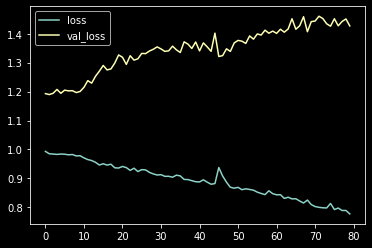

In [0]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

KeyError: ignored